# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import date

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key + "&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        response = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']
              

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | berezovyy
Processing Record 3 of Set 1 | galveston
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | alta sierra
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | coahuayana de hidalgo
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | tucurui
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | praya
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | raja
Processing Record 17 of Set 1 | tsiombe
Processing Record 18 of Set 1 | goz beida
Processing Record 19 of Set 1 | tsengel
Processing Record 20 of Set 1 | stanley
Processing Record 21 of Set 1 | alice springs
Processing Record 22 of Set 1 | bac lieu
P

City not found. Skipping...
Processing Record 41 of Set 4 | tiksi
Processing Record 42 of Set 4 | glazov
Processing Record 43 of Set 4 | kirchenviertel
Processing Record 44 of Set 4 | arenapolis
Processing Record 45 of Set 4 | rongelap
Processing Record 46 of Set 4 | utrik
Processing Record 47 of Set 4 | saudarkrokur
Processing Record 48 of Set 4 | wellington
Processing Record 49 of Set 4 | bamboo flat
Processing Record 0 of Set 5 | belev
Processing Record 1 of Set 5 | veinticinco de mayo
Processing Record 2 of Set 5 | jinka
Processing Record 3 of Set 5 | kaedi
Processing Record 4 of Set 5 | dalnerechensk
Processing Record 5 of Set 5 | keflavik
Processing Record 6 of Set 5 | amargosa
Processing Record 7 of Set 5 | sao joao da barra
Processing Record 8 of Set 5 | tazovsky
Processing Record 9 of Set 5 | fort bragg
Processing Record 10 of Set 5 | tolanaro
Processing Record 11 of Set 5 | vorgashor
Processing Record 12 of Set 5 | spanish wells
Processing Record 13 of Set 5 | akureyri
Proces

Processing Record 33 of Set 8 | dorohoi
Processing Record 34 of Set 8 | tabuk
Processing Record 35 of Set 8 | staryye ozinki
Processing Record 36 of Set 8 | howard springs
Processing Record 37 of Set 8 | digras
Processing Record 38 of Set 8 | kapenguria
Processing Record 39 of Set 8 | kone
Processing Record 40 of Set 8 | rio grande
Processing Record 41 of Set 8 | bubaque
Processing Record 42 of Set 8 | bangor
Processing Record 43 of Set 8 | petropavlovsk-kamchatsky
Processing Record 44 of Set 8 | port saint john's
Processing Record 45 of Set 8 | lycksele
Processing Record 46 of Set 8 | ad dawadimi
Processing Record 47 of Set 8 | saqqez
Processing Record 48 of Set 8 | al hazm
Processing Record 49 of Set 8 | polatli
Processing Record 0 of Set 9 | san miguel de salinas
Processing Record 1 of Set 9 | chimoio
Processing Record 2 of Set 9 | ta`u
Processing Record 3 of Set 9 | mokrous
Processing Record 4 of Set 9 | oranjemund
Processing Record 5 of Set 9 | kununurra
Processing Record 6 of Set

Processing Record 24 of Set 12 | gebeit
Processing Record 25 of Set 12 | yung shue wan
Processing Record 26 of Set 12 | mary
Processing Record 27 of Set 12 | ikalamavony
Processing Record 28 of Set 12 | axim
Processing Record 29 of Set 12 | cartagena
Processing Record 30 of Set 12 | tanrake village
City not found. Skipping...
Processing Record 31 of Set 12 | tokar
Processing Record 32 of Set 12 | akjoujt
Processing Record 33 of Set 12 | cape coast
Processing Record 34 of Set 12 | ylitornio
Processing Record 35 of Set 12 | tharangambadi
Processing Record 36 of Set 12 | weinan
Processing Record 37 of Set 12 | zhangjiakou
Processing Record 38 of Set 12 | isla mujeres
Processing Record 39 of Set 12 | votkinsk
Processing Record 40 of Set 12 | wake village
Processing Record 41 of Set 12 | takoradi
Processing Record 42 of Set 12 | karamay
City not found. Skipping...
Processing Record 43 of Set 12 | gorontalo
Processing Record 44 of Set 12 | rudbar
Processing Record 45 of Set 12 | santiago del

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,0.85,69,75,4.63,CA,1686621739
1,berezovyy,51.6667,135.7000,21.84,47,19,2.35,RU,1686621739
2,galveston,29.3669,-94.9669,28.43,84,0,5.66,US,1686621739
3,bethel,41.3712,-73.4140,20.05,88,100,3.60,US,1686621495
4,alta sierra,35.7291,-118.5495,17.84,53,98,3.01,US,1686621740


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,0.85,69,75,4.63,CA,1686621739
1,berezovyy,51.6667,135.7000,21.84,47,19,2.35,RU,1686621739
2,galveston,29.3669,-94.9669,28.43,84,0,5.66,US,1686621739
3,bethel,41.3712,-73.4140,20.05,88,100,3.60,US,1686621495
4,alta sierra,35.7291,-118.5495,17.84,53,98,3.01,US,1686621740


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

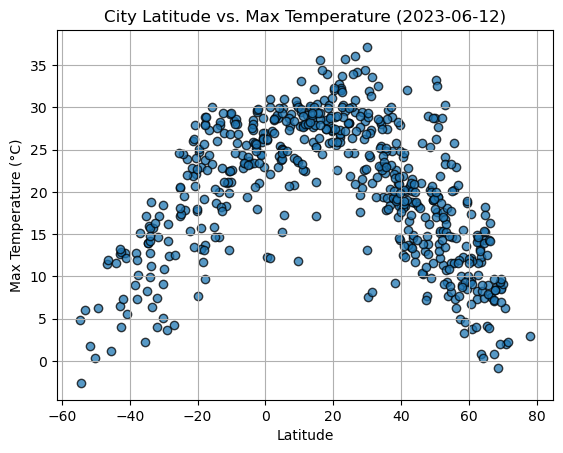

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha = 0.75,edgecolors = 'black' )

# Incorporate the other graph properties
plt.ylabel('Max Temperature (°C)')
plt.xlabel('Latitude')
plt.title(f"City Latitude vs. Max Temperature ({date.today()})")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

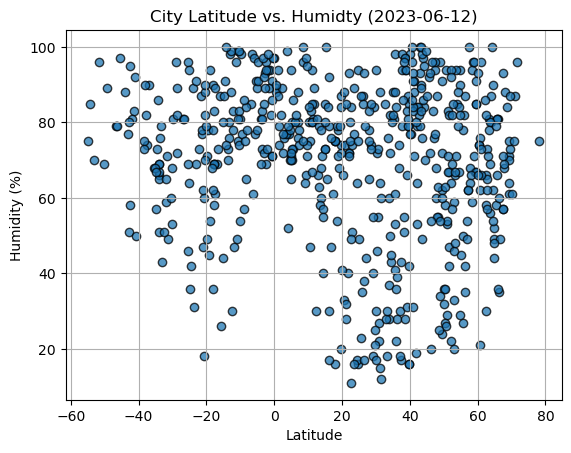

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha = 0.75,edgecolors = 'black')

# Incorporate the other graph properties
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title(f"City Latitude vs. Humidty ({date.today()})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

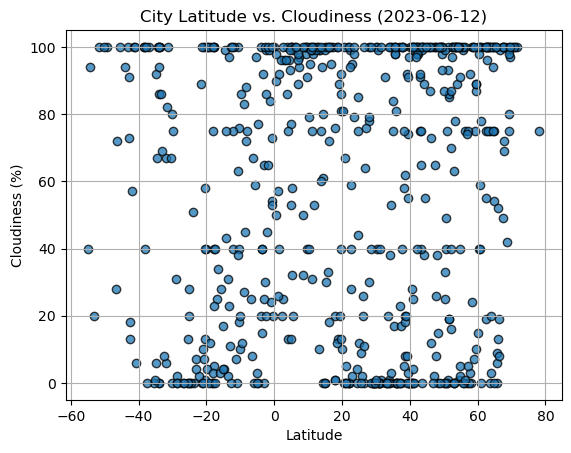

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha = 0.75,edgecolors = 'black')
# Incorporate the other graph properties

plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title(f"City Latitude vs. Cloudiness ({date.today()})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

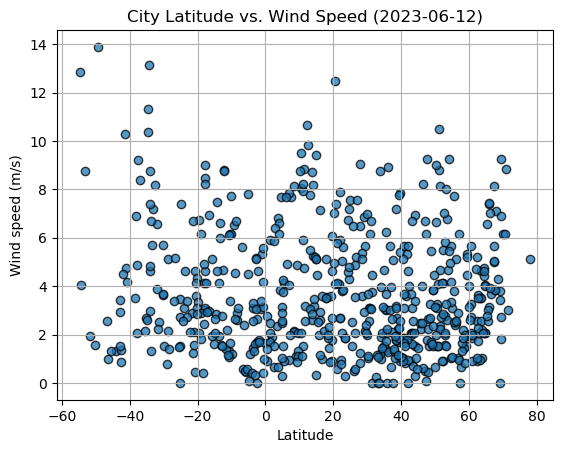

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha = 0.75,edgecolors = 'black')

# Incorporate the other graph properties
plt.ylabel('Wind speed (m/s)')
plt.xlabel('Latitude')
plt.title(f"City Latitude vs. Wind Speed ({date.today()})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def Plot_Line_equation(x_values, y_values, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values= slope*x_values + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    if slope >0:
        x_loc = x_values.min() + 5
        y_loc = y_values.max() - 5
    else:
        x_loc = x_values.median() 
        y_loc = y_values.max() - 5
        
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (x_loc, y_loc), fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    (print(f"The r-value is: {rvalue**2}"))
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0,:]

                                   
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,0.85,69,75,4.63,CA,1686621739
1,berezovyy,51.6667,135.7000,21.84,47,19,2.35,RU,1686621739
2,galveston,29.3669,-94.9669,28.43,84,0,5.66,US,1686621739
3,bethel,41.3712,-73.4140,20.05,88,100,3.60,US,1686621495
4,alta sierra,35.7291,-118.5495,17.84,53,98,3.01,US,1686621740


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,blackmans bay,-43.0167,147.3167,12.63,77,100,3.42,AU,1686621740
7,port-aux-francais,-49.3500,70.2167,6.25,89,100,13.89,TF,1686621740
9,adamstown,-25.0660,-130.1015,20.41,64,28,3.45,PN,1686621740
11,tucurui,-3.7661,-49.6725,25.96,81,100,1.46,BR,1686621740
12,waitangi,-43.9535,-176.5597,11.57,88,94,1.34,NZ,1686621740


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5491353308437935


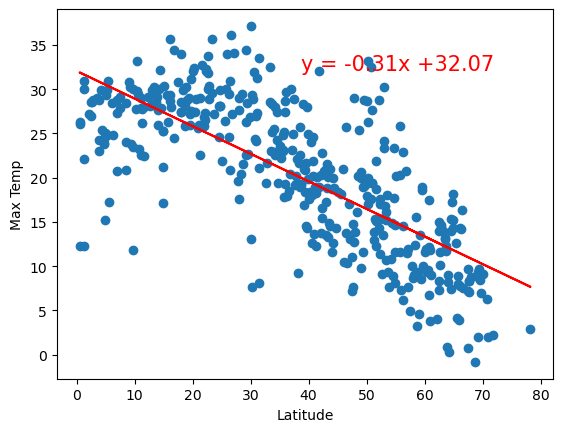

In [16]:
# Linear regression on Northern Hemisphere
Plot_Line_equation(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Max Temp")

The r-value is: 0.6308053267130566


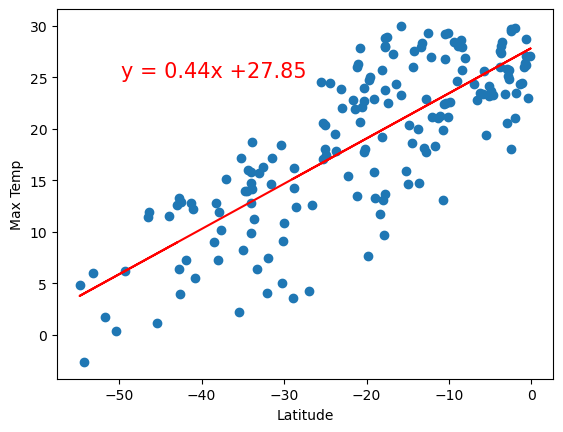

In [17]:
# Linear regression on Southern Hemisphere
Plot_Line_equation(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Max Temp")

**Discussion about the linear relationship:** In the norther hemisphere, there is a moderate negative correlation coefficient of 0.55 between max temperature and latitude. As the latitude increases, the max temperature decreases. Whereas in the southern hemisphere, there is a moderate positive correlation coefficient of 0.63. Especially during this time of the year. The graph would probably look different during different seasons. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.002238075656277906


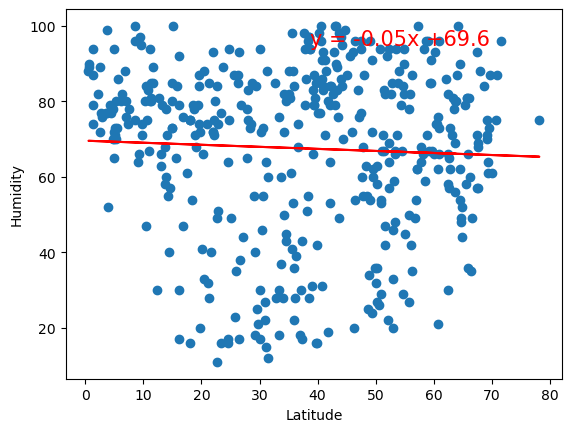

In [18]:
# Northern Hemisphere
Plot_Line_equation(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Humidity")

The r-value is: 0.03433482768272821


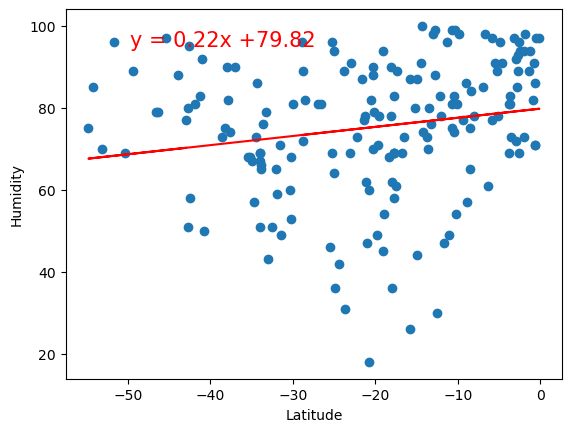

In [19]:
# Southern Hemisphere
Plot_Line_equation(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Humidity")

**Discussion about the linear relationship:** In the norther hemisphere, there is no correlation (coefficient of 0.00) between humidity and latitude. However, since there is a linear regression of -0.05 and we can see that there is a slight slant of the slope. In southern hemisphere, there is a very weak positive correlation coefficient of 0.03. The temperature slightly increases as the latitude increases. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 9.42023769376764e-06


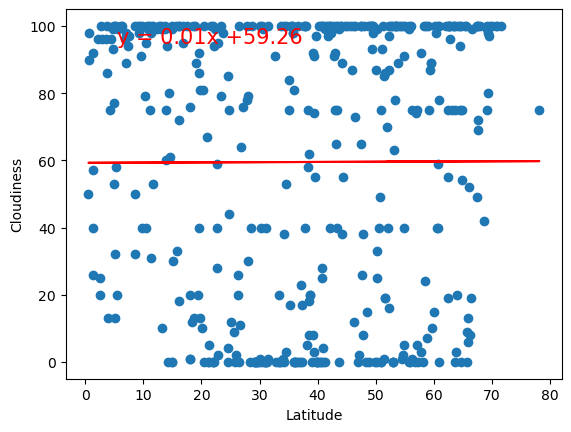

In [25]:
# Northern Hemisphere
Plot_Line_equation(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Cloudiness")

The r-value is: 0.008510124355768103


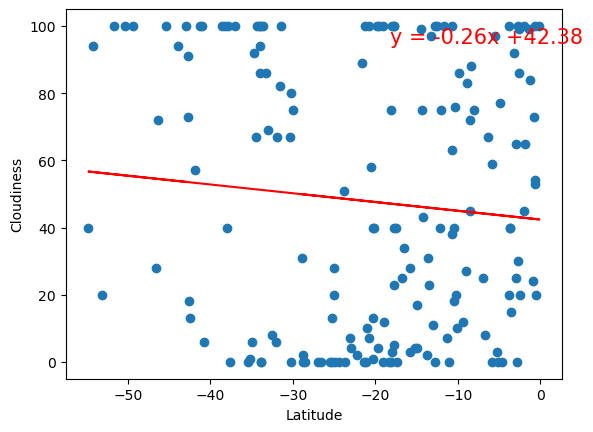

In [21]:
# Southern Hemisphere
Plot_Line_equation(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Cloudiness")

**Discussion about the linear relationship:** In the norther hemisphere, there is no correlation between cloudiness and latitude. As you can even see in the scatter plot graph, the points practically cover all areas of the graph. In southern hemisphere, there is a very weak negative correlation coefficient of 0.008. Overall there is barely any correlation between cloudiness and latitude.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.002648277184087249


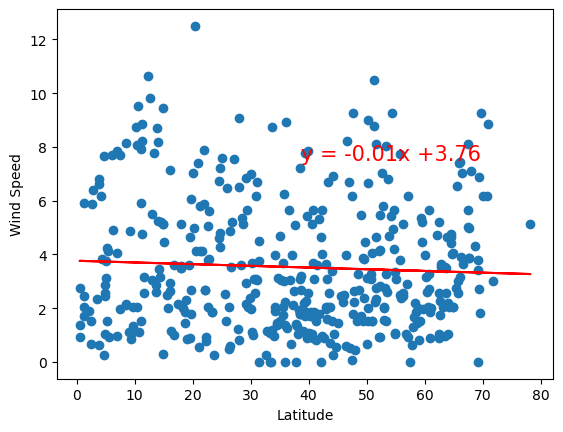

In [22]:
# Northern Hemisphere
Plot_Line_equation(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Wind Speed")

The r-value is: 0.07172579754427837


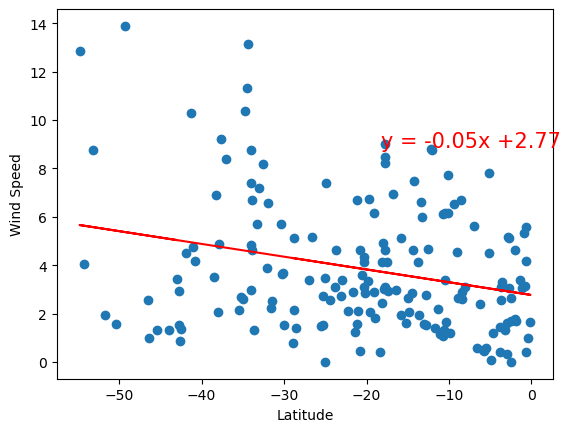

In [23]:
# Southern Hemisphere
Plot_Line_equation(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Wind Speed")

**Discussion about the linear relationship:** In the norther hemisphere, there is no correlation between wind and latitude. There is very tiny negative slope, but again almost negligeable. In southern hemisphere, there is also a very weak negative correlation, but slightly stronger than the northern hemisphere. Overall is an extremely weak correlation between wind speed and latitude.   